# CoMPARA Predictions and Unrestricted Dataset Cross-Validation

In [1]:
import pandas as pd

import ml
import utils
import analysis 

c:\Users\GNZFG\AppData\Local\miniforge-pypy3\envs\AndroR\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
andror_df_all = pd.read_csv("../andror_df_all_clusters.csv", index_col=0)

In [3]:
pix_features = pd.read_csv("../AndroR_4_final_dataset_training_ALL_STD_rdkit_pix_descriptors 2.csv", index_col=0)
andror_df_all = pd.merge(andror_df_all, pix_features, on='flat_smiles', how='inner')
andror_df_all["final class"] = andror_df_all["final class_x"] # due to the merge command, some columns are duplicated and with a suffix

In [4]:
andror_df_pub = pd.read_csv("../AndroR_4_final_dataset_training_PUB_STD_rdkit.csv", index_col=0)

In [5]:
andror_df_all["unrestricted"] = andror_df_all["Compound No_x"].isin(andror_df_pub["Compound No"])

In [6]:
rdkit_descriptors = pd.read_csv("../rdkit_descriptors.csv")

In [7]:
andror_df_pub = andror_df_all[andror_df_all["unrestricted"]]
rdkit_descriptors_pub = rdkit_descriptors.loc[andror_df_all[andror_df_all["unrestricted"]].index]

In [8]:
fps = utils.get_fingerprints(andror_df_pub)

In [9]:
groups = utils.get_cluster_assignments_from_fps(fps, 0.65, chunk_size=5000)

# Cross-validation on unrestricted Dataset

In [ ]:
splits_rdkit_descriptors_unrestricted, pipelines_rdkit_descriptors_unrestricted = ml.run_or_retrieve_from_disc(
    X=rdkit_descriptors_pub, 
    y=andror_df_pub["final class"], 
    groups=groups, 
    training_name="RDKit_descriptors_unrestricted",
)

In [10]:
CV_unrestricted = analysis.CV(splits_rdkit_descriptors_unrestricted)

In [ ]:
splits_rdkit_descriptors, pipelines_rdkit_descriptors = ml.run_or_retrieve_from_disc(
    X=rdkit_descriptors, 
    y=andror_df_all["final class"], 
    groups=groups, 
    training_name="RDKit_descriptors",
)

In [12]:
CV_full = analysis.CV(splits_rdkit_descriptors)

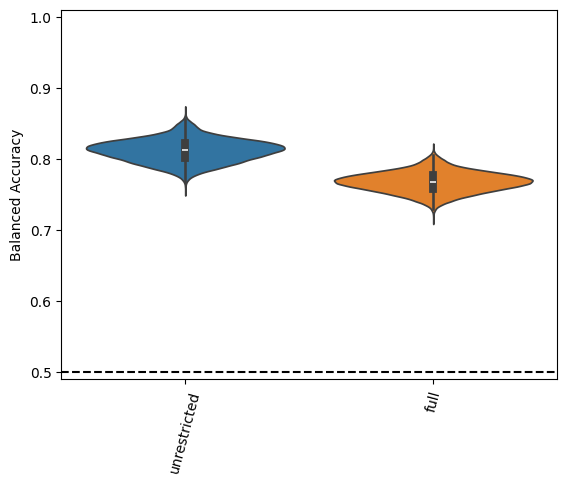

In [14]:
analysis.violinplot_bayesian_estimate_of_performance_metrics({
    "unrestricted": CV_unrestricted,
    "full": CV_full,
}, sel_metric="balanced accuracy")